In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!cd

D:\Documents\Untitled_Folder\YoloV3Tut\Mask


In [3]:
net = cv2.dnn.readNetFromDarknet('yolov3-tiny-prn.cfg','mask-yolov3-tiny-prn.weights')
# net = cv2.dnn.readNetFromDarknet('yolov3-spp.cfg','yolov3_custommask_last.weights')

In [4]:
classes = ['good','bad','none']

In [5]:
cap = cv2.VideoCapture(0)

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(1280,720))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net.setInput(blob)

    output_layers_name = net.getUnconnectedOutLayersNames()

    layerOutputs = net.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)


    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)

    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [10]:
my_img = cv2.imread('dataset/images/train/004_1024.jpeg')
ht, wt, _=  my_img.shape
blob = cv2.dnn.blobFromImage(my_img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)
net.setInput(blob)
output_layers_name = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_name)
layerOutputs[0][1]

array([5.4256625e-02, 2.9455077e-02, 4.4796133e-01, 5.1660055e-01,
       1.0305462e-05, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [11]:
layerOutputs[2].shape

(8112, 7)

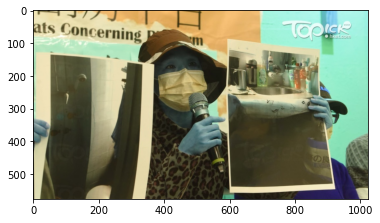

In [12]:
plt.imshow(my_img)

In [13]:
layerOutputs[0][0]

array([5.5501461e-02, 4.3624025e-02, 1.8246236e-01, 1.7466030e-01,
       4.1649848e-05, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [46]:
boxes =[]
confidences = []
class_ids = []

for output in layerOutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.0:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * hight)
            w = int(detection[2] * width)
            h = int(detection[3]* hight)

            x = int(center_x - w/2)
            y = int(center_y - h/2)



            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)


In [47]:

indexes = cv2.dnn.NMSBoxes(boxes,confidences,.0,.0)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))

In [48]:
indexes

()

In [49]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)

AttributeError: 'tuple' object has no attribute 'flatten'